In [ ]:
import numpy as np
import pandas as pd


: 

In [3]:
df = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv", encoding="latin1")
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2216,ham,OK i'm waliking ard now... Do u wan me 2 buy a...,NaN,NaN,NaN
4120,ham,Yunny... I'm goin to be late,NaN,NaN,NaN
1750,ham,Got it..mail panren paru..,NaN,NaN,NaN
2342,spam,Double your mins & txts on Orange or 1/2 price...,NaN,NaN,NaN
714,ham,He also knows about lunch menu only da. . I know,NaN,NaN,NaN


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2216,ham,OK i'm waliking ard now... Do u wan me 2 buy a...,NaN,NaN,NaN
4120,ham,Yunny... I'm goin to be late,NaN,NaN,NaN
1750,ham,Got it..mail panren paru..,NaN,NaN,NaN
2342,spam,Double your mins & txts on Orange or 1/2 price...,NaN,NaN,NaN
714,ham,He also knows about lunch menu only da. . I know,NaN,NaN,NaN


In [4]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [5]:
df.shape

(5572, 5)

In [6]:
#1. Data Cleaning
#2. EDA
#3. Text Preprocessor
#4. Model Building
#5. Evaluation
#6. Improvement
#7. Website
#8. Deploy

### 1. Data Cleaning

In [7]:
#This tells me no. of non null values and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
#drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
#Renaming the columns
df.rename(columns = {'v1': 'target','v2' : 'text'},inplace = True)
df.sample(5)

,target,text
117,ham,Goodo! Yes we must speak friday - egg-potato r...
2008,ham,See the forwarding message for proof
3006,ham,Ah you see. You have to be in the lingo. I wil...
5525,ham,I want to tell you how bad I feel that basical...
5050,ham,With my sis lor... We juz watched italian job.


In [10]:
#Using label encoding for cat variable
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
#check for duplicate values
df.duplicated().sum()

403

In [15]:
#remove duplicates
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

### 2. EDA

In [18]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

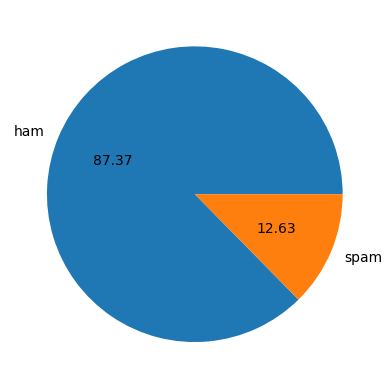

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct = "%0.2f")
plt.show()

In [20]:
# Data is imbalanced

In [21]:
import nltk

In [22]:
df.loc[:,('num_characters')] = df['text'].apply(len)
#df['num_ch'] = df['text'].apply(len)

In [23]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
# number of words / message
df.loc[:,'num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [25]:
#number of sentences / txt
df.loc[:,('num_sentences')] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [26]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
df[['num_sentences','num_characters','num_words']].describe()

,num_sentences,num_characters,num_words
count,5169.000000,5169.000000,5169.000000
mean,1.961308,78.977945,18.286129
std,1.432583,58.236293,13.226400
min,1.000000,2.000000,1.000000
25%,1.000000,36.000000,9.000000
50%,1.000000,60.000000,15.000000
75%,2.000000,117.000000,26.000000
max,38.000000,910.000000,219.000000


In [28]:
#Descriptive stats of ham messages
df[df['target']==0][['num_sentences','num_characters','num_words']].describe()

,num_sentences,num_characters,num_words
count,4516.000000,4516.000000,4516.000000
mean,1.815545,70.459256,16.957484
std,1.364098,56.358207,13.394052
min,1.000000,2.000000,1.000000
25%,1.000000,34.000000,8.000000
50%,1.000000,52.000000,13.000000
75%,2.000000,90.000000,22.000000
max,38.000000,910.000000,219.000000


In [29]:
df[df['target']==1][['num_sentences','num_characters','num_words']].describe()

,num_sentences,num_characters,num_words
count,653.000000,653.000000,653.000000
mean,2.969372,137.891271,27.474732
std,1.488910,30.137753,6.893007
min,1.000000,13.000000,2.000000
25%,2.000000,132.000000,25.000000
50%,3.000000,149.000000,29.000000
75%,4.000000,157.000000,32.000000
max,9.000000,224.000000,44.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

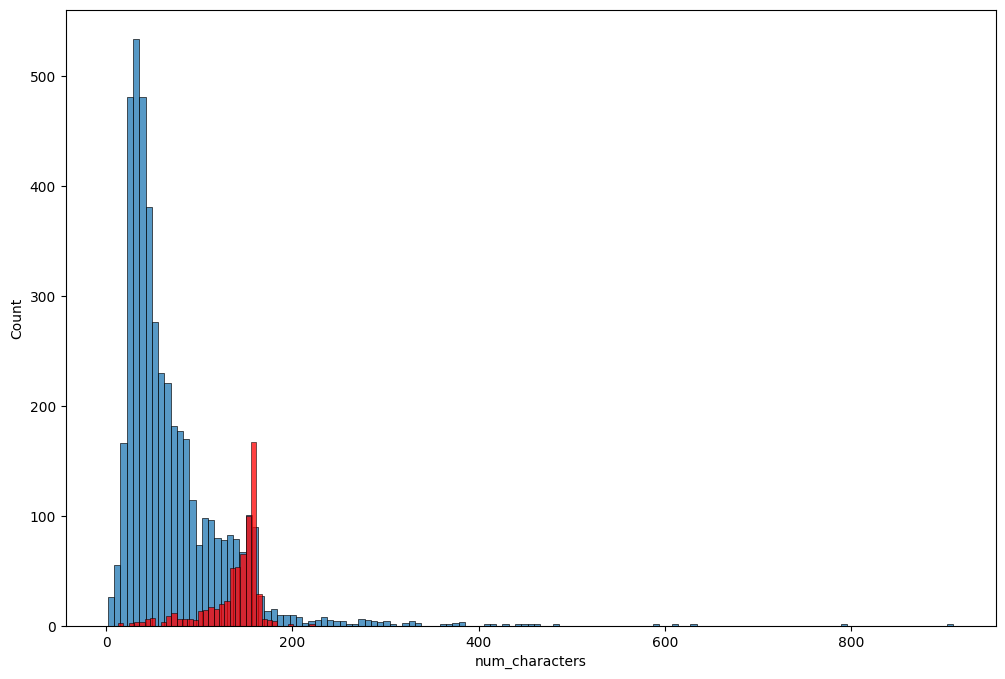

In [30]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

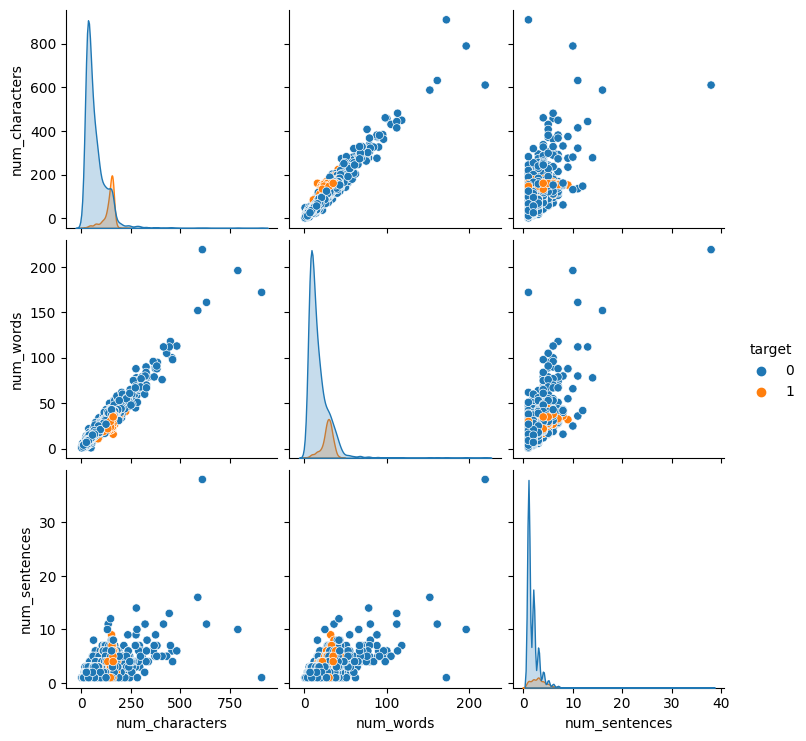

In [31]:
import warnings
warnings.filterwarnings('ignore')
sns.pairplot(df,hue='target')

<Axes: >

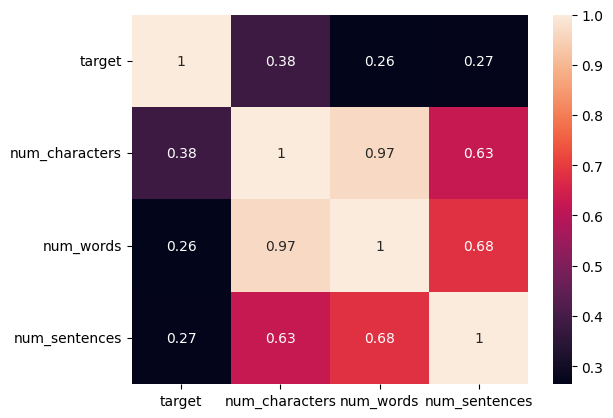

In [32]:
new_df = df.drop('text',axis=1)
sns.heatmap(new_df.corr(),annot = True)


3. Data Preprocessing

    - Lower case
    - Tokenization
    - Removing special characters
    - Removing stop words and punctuation
    - Stemming



In [33]:
from nltk.corpus import stopwords
stopwords.words('english')
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [34]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [35]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            #If i is alphabet/number then keep it, else remove spl characters - %@#,*$ etc.
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [36]:
transform_text('I loved studying ml from youtube. what about you ?')

'love studi ml youtub'

In [37]:
df.loc[:,'transformed_text'] = df['text'].apply(transform_text)

In [38]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [39]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10,background_color='black')

In [40]:
df['transformed_text'].dtype

dtype('O')

In [ ]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))


In [ ]:
plt.figure(figsize=(15,8))
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

In [ ]:
plt.figure(figsize=(15,8))
plt.imshow(ham_wc)

In [ ]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
    

In [ ]:
len(spam_corpus)

In [ ]:
from collections import Counter

In [ ]:
Counter(spam_corpus).most_common(30)

In [ ]:

sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
ham_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

### 4. Model Building

In [41]:
X = df['transformed_text']

In [42]:
y = df['target'].values

In [43]:
X.shape

(5169,)

In [44]:
y.shape

(5169,)

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 2)

In [46]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [47]:
X_train_vectorized = cv.fit_transform(X_train).toarray()
X_test_vectorized = cv.transform(X_test).toarray()

In [48]:
y.shape

(5169,)

In [49]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [50]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [51]:
gnb.fit(X_train_vectorized,y_train)
y_pred1 = gnb.predict(X_test_vectorized)
print(accuracy_score(y_pred1,y_test))
print(confusion_matrix(y_pred1,y_test))
print(precision_score(y_pred1,y_test))

0.874274661508704
[[786  20]
 [110 118]]
0.855072463768116


In [52]:
mnb.fit(X_train_vectorized,y_train)
y_pred2 = mnb.predict(X_test_vectorized)
print(accuracy_score(y_pred2,y_test))
print(confusion_matrix(y_pred2,y_test))
print(precision_score(y_pred2,y_test))

0.9758220502901354
[[887  16]
 [  9 122]]
0.8840579710144928


In [53]:
bnb.fit(X_train_vectorized,y_train)
y_pred3 = bnb.predict(X_test_vectorized)
print(accuracy_score(y_pred3,y_test))
print(confusion_matrix(y_pred3,y_test))
print(precision_score(y_pred3,y_test))

0.9661508704061895
[[896  35]
 [  0 103]]
0.7463768115942029


In [54]:
X_train_vectorized = tfidf.fit_transform(X_train).toarray()
X_test_vectorized = tfidf.transform(X_test).toarray()

In [55]:
gnb.fit(X_train_vectorized,y_train)
y_pred1 = gnb.predict(X_test_vectorized)
print(accuracy_score(y_pred1,y_test))
print(confusion_matrix(y_pred1,y_test))
print(precision_score(y_pred1,y_test))

0.8694390715667312
[[786  25]
 [110 113]]
0.8188405797101449


In [56]:
mnb.fit(X_train_vectorized,y_train)
y_pred2 = mnb.predict(X_test_vectorized)
print(accuracy_score(y_pred2,y_test))
print(confusion_matrix(y_pred2,y_test))
print(precision_score(y_pred2,y_test))

0.9584139264990329
[[896  43]
 [  0  95]]
0.6884057971014492


In [57]:
bnb.fit(X_train_vectorized,y_train)
y_pred3 = bnb.predict(X_test_vectorized)
print(accuracy_score(y_pred3,y_test))
print(confusion_matrix(y_pred3,y_test))
print(precision_score(y_pred3,y_test))

0.9661508704061895
[[896  35]
 [  0 103]]
0.7463768115942029


In [58]:
#best score = cv --> mnb

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [60]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [61]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [62]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [63]:
train_classifier(svc,X_train_vectorized,y_train,X_test_vectorized,y_test)

(0.9787234042553191, 0.967741935483871)

In [64]:
accuracy_scores = []
precision_scores = []

for key,value in clfs.items():
    current_acc,curr_prec = train_classifier(value,X_train_vectorized,y_train,X_test_vectorized,y_test)
    print('For: ', key)
    print('Accuracy: ',current_acc)
    print('Precision: ',curr_prec)
    accuracy_scores.append(current_acc)
    precision_scores.append(curr_prec)
    

For:  SVC
Accuracy:  0.9787234042553191
Precision:  0.967741935483871
For:  KN
Accuracy:  0.9052224371373307
Precision:  1.0
For:  NB
Accuracy:  0.9584139264990329
Precision:  1.0
For:  DT
Accuracy:  0.9342359767891683
Precision:  0.8645833333333334
For:  LR
Accuracy:  0.9574468085106383
Precision:  0.9351851851851852
For:  RF
Accuracy:  0.9700193423597679
Precision:  0.9819819819819819
For:  AdaBoost
Accuracy:  0.960348162475822
Precision:  0.9292035398230089
For:  BgC
Accuracy:  0.9555125725338491
Precision:  0.8770491803278688
For:  ETC
Accuracy:  0.97678916827853
Precision:  0.975
For:  GBDT
Accuracy:  0.9468085106382979
Precision:  0.9029126213592233
For:  xgb
Accuracy:  0.9690522243713733
Precision:  0.9491525423728814


In [69]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [70]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.958414,1.000000
5,RF,0.970019,0.981982
8,ETC,0.976789,0.975000
0,SVC,0.978723,0.967742
10,xgb,0.969052,0.949153
4,LR,0.957447,0.935185
6,AdaBoost,0.960348,0.929204
9,GBDT,0.946809,0.902913
7,BgC,0.955513,0.877049


In [71]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.958414
2,RF,Accuracy,0.970019
3,ETC,Accuracy,0.976789
4,SVC,Accuracy,0.978723
5,xgb,Accuracy,0.969052
6,LR,Accuracy,0.957447
7,AdaBoost,Accuracy,0.960348
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.955513


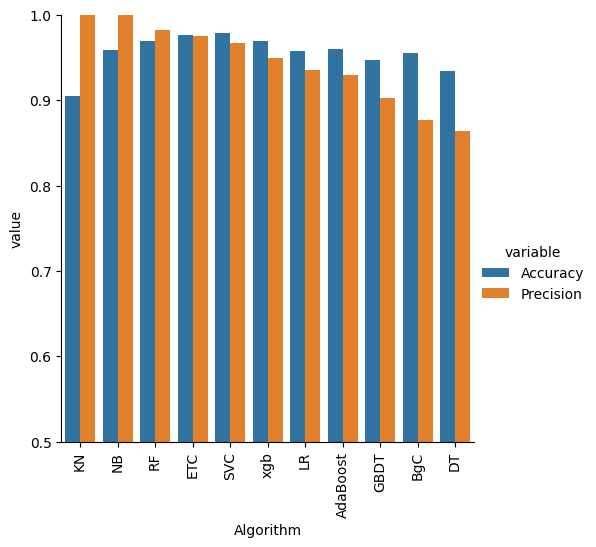

In [85]:
sns.catplot(y = 'value', x = 'Algorithm', data = performance_df1, kind = 'bar',hue = 'variable',orient='v')
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [86]:
tfidf = TfidfVectorizer(max_features=3000)
X_train_vectorized = cv.fit_transform(X_train).toarray()
X_test_vectorized = cv.transform(X_test).toarray()

In [87]:
accuracy_scores = []
precision_scores = []

for key,value in clfs.items():
    current_acc,curr_prec = train_classifier(value,X_train_vectorized,y_train,X_test_vectorized,y_test)
    accuracy_scores.append(current_acc)
    precision_scores.append(curr_prec)

In [88]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores})

In [89]:
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.905222,1.000000,0.906190,1.000000
1,NB,0.958414,1.000000,0.975822,0.931298
2,RF,0.970019,0.981982,0.970019,1.000000
3,ETC,0.976789,0.975000,0.974855,0.982759
4,SVC,0.978723,0.967742,0.925532,0.719424
5,xgb,0.969052,0.949153,0.970986,0.965517
6,LR,0.957447,0.935185,0.973888,0.974359
7,AdaBoost,0.960348,0.929204,0.962282,0.962617
8,GBDT,0.946809,0.902913,0.947776,0.946809
9,BgC,0.955513,0.877049,0.961315,0.915254


In [92]:
tfidf = TfidfVectorizer(max_features=3000)
X_train_vectorized = cv.fit_transform(X_train).toarray()
X_test_vectorized = cv.transform(X_test).toarray()

In [93]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_vectorized)
X_test_scaled = scaler.transform(X_test_vectorized)

In [95]:
accuracy_scores = []
precision_scores = []

for key,value in clfs.items():
    current_acc,curr_prec = train_classifier(value,X_train_scaled,y_train,X_test_scaled,y_test)
    accuracy_scores.append(current_acc)
    precision_scores.append(curr_prec)

In [96]:
temp_df_scaled = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores})

In [97]:
new_df_scaled = new_df.merge(temp_df_scaled,on='Algorithm')
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling
0,KN,0.905222,1.000000,0.906190,1.000000,0.901354,1.000000
1,NB,0.958414,1.000000,0.975822,0.931298,0.978723,0.967742
2,RF,0.970019,0.981982,0.970019,1.000000,0.970019,1.000000
3,ETC,0.976789,0.975000,0.974855,0.982759,0.974855,0.982759
4,SVC,0.978723,0.967742,0.925532,0.719424,0.970986,0.942623
5,xgb,0.969052,0.949153,0.970986,0.965517,0.970986,0.965517
6,LR,0.957447,0.935185,0.973888,0.974359,0.973888,0.991150
7,AdaBoost,0.960348,0.929204,0.962282,0.962617,0.962282,0.962617
8,GBDT,0.946809,0.902913,0.947776,0.946809,0.947776,0.946809
9,BgC,0.955513,0.877049,0.961315,0.915254,0.961315,0.915254


In [98]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [99]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [100]:
voting.fit(X_train_vectorized,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [102]:
y_pred = voting.predict(X_test_vectorized)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.983739837398374


In [103]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [104]:
from sklearn.ensemble import StackingClassifier

In [105]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [107]:
clf.fit(X_train_vectorized,y_train)
y_pred = clf.predict(X_test_vectorized)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.9682539682539683


In [108]:
import pickle
pickle.dump(cv,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))